# Convergence Analysis of $\epsilon_{Ionic}$ and $\epsilon_{Optic}$

$\epsilon_0 = \epsilon_{Ionic} + \epsilon_{Optic}$

## $\epsilon_{Ionic}$

Calculated with DFPT (`LEPSILON = True` etc). Important parameters for convergence are `ENCUT` (plane wave kinetic energy cutoff)(i.e. basis set size) and **_k_**-point density (specified in `KPOINTS` file).

### **_k_**-point Convergence of $\epsilon_{Ionic}$: 

#### $Cs_2AgSbBr_6$

Using PBEsol GGA DFT functional, NBANDS = 46 (approx. 6 eV above VBM)(38 occupied bands, 10 unoccupied), 600 eV plane-wave cutoff and $\Gamma$-centred Monkhorst pack k-grid densities from $8\times8\times8$ to $12\times12\times12$ (cubic system with _c_ = 11.1 Angstrom).

Final datapoint value of epsilon_(Ionic) = 7.572


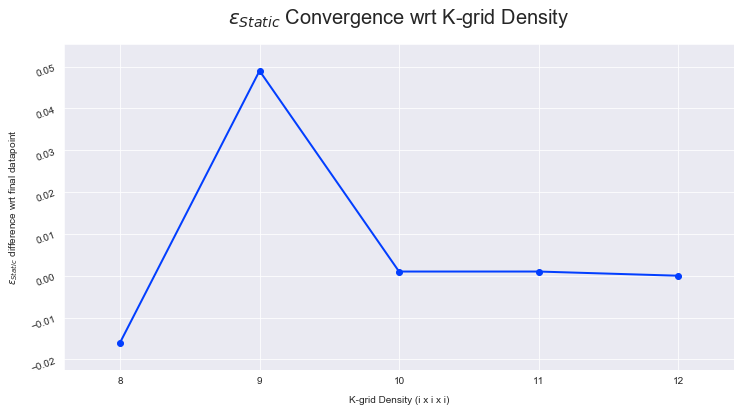

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette(sns.color_palette('bright'))
sns.set_style('darkgrid')
kconv_eps = np.array([7.556,7.621,7.573,7.573,7.572])
k_range = np.arange(8, 12.1)

f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(k_range, (kconv_eps-kconv_eps[-1]),  # color='steelblue',
           marker="o", label="Convergence E0", linewidth=2, linestyle='-')
ax.grid(True)
ax.set_xlabel("K-grid Density (i x i x i)", labelpad=10)
ax.set_ylabel(r"$\epsilon_{Ionic}$ difference wrt final datapoint", labelpad=10)
ax.set_title(r"$\epsilon_{Ionic}$ Convergence wrt K-grid Density",
             fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax.margins(0.1)
ax.ticklabel_format(useOffset=False)
plt.setp(ax.get_yticklabels(), rotation=20)
print(f"Final datapoint value of epsilon_(Ionic) = {kconv_eps[-1]:.3f}")
#plt.savefig('kpoint_Convergence.png')

#### $Cs_2AgBiBr_6$

Using PBEsol GGA DFT functional, NBANDS = 46 (approx. 6 eV above VBM)(38 occupied bands, 10 unoccupied), 600 eV plane-wave cutoff and $\Gamma$-centred Monkhorst pack k-grid densities from $8\times8\times8$ to $12\times12\times12$ (cubic system with _c_ = 11.2 Angstrom).

Final datapoint value of epsilon_(Ionic) = 8.025


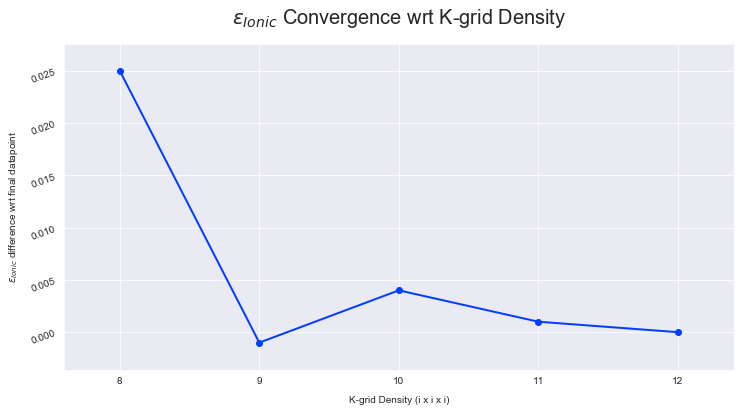

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette(sns.color_palette('bright'))
sns.set_style('darkgrid')
kconv_eps = np.array([8.05,8.024,8.029,8.026,8.025])
k_range = np.arange(8, 12.1)

f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(k_range, (kconv_eps-kconv_eps[-1]),  # color='steelblue',
           marker="o", label="Convergence E0", linewidth=2, linestyle='-')
ax.grid(True)
ax.set_xlabel("K-grid Density (i x i x i)", labelpad=10)
ax.set_ylabel(r"$\epsilon_{Ionic}$ difference wrt final datapoint", labelpad=10)
ax.set_title(r"$\epsilon_{Ionic}$ Convergence wrt K-grid Density",
             fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax.margins(0.1)
ax.ticklabel_format(useOffset=False)
plt.setp(ax.get_yticklabels(), rotation=20)
print(f"Final datapoint value of epsilon_(Ionic) = {kconv_eps[-1]:.3f}")
#plt.savefig('kpoint_Convergence.png')

### `ENCUT` Convergence of $\epsilon_{Ionic}$: 

**Beware `Warning: PSMAXN too small for non-local potential` (in `OUTCAR` and `stdout` files) at too high `ENCUT`!**   
VASP runs, but the results for $\epsilon_{Ionic}$ begin to diverge.

#### $Cs_2AgSbBr_6$

Using PBEsol GGA DFT functional, NBANDS = 80 (38 occupied bands, 42 unoccupied), $\Gamma$-centred Monkhorst pack k-grid density of $10\times10\times10$ (cubic system with _c_ = 11.1 Angstrom), with `ENCUT` varied from 400 to 1000 eV.

'Converged' datapoint value, at 800 eV, is epsilon_(Ionic) = 8.775


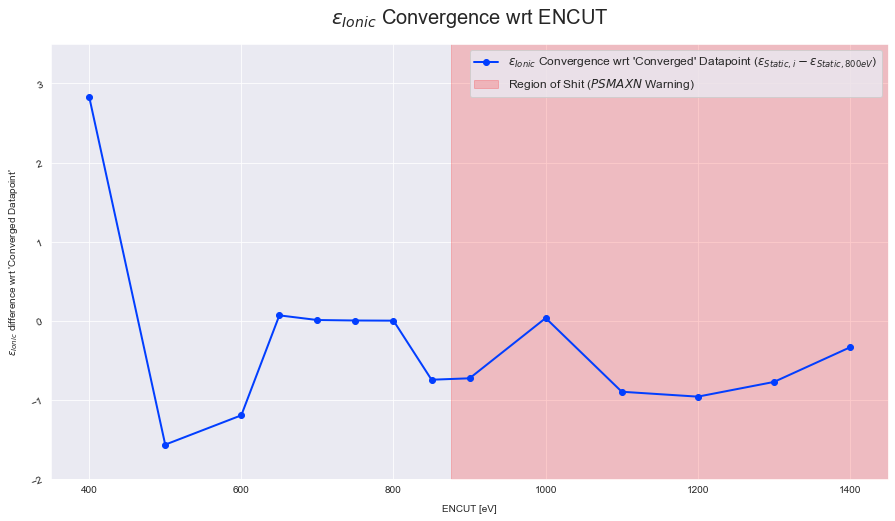

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette(sns.color_palette('bright'))
sns.set_style('darkgrid')
enconv_eps = np.array([11.609,7.207,7.578,8.842,8.783,8.777,8.775,8.028,8.046,8.808,7.876,7.814,8.000,8.438])
encut_range = np.array([400,500,600,650,700,750,800,850,900,1000,1100,1200,1300,1400])

f, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(encut_range, (enconv_eps-enconv_eps[6]),  # color='steelblue',
           marker="o", label=r"$\epsilon_{Ionic}$ Convergence wrt 'Converged' Datapoint ($\epsilon_{Static,i}-\epsilon_{Static,800 eV}$)", linewidth=2, linestyle='-')
ax.grid(True)
ax.set_xlabel("ENCUT [eV]", labelpad=10)
ax.set_ylabel(r"$\epsilon_{Ionic}$ difference wrt 'Converged Datapoint'", labelpad=10)
ax.set_title(r"$\epsilon_{Ionic}$ Convergence wrt ENCUT",
             fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax.margins(0.1)
ax.ticklabel_format(useOffset=False)
plt.setp(ax.get_yticklabels(), rotation=20)
plt.fill_between(np.arange(875,1500.1,100),-2,4,color='red',alpha=0.2,label=r'Region of Shit ($PSMAXN$ Warning)')
plt.legend(prop={'size': 12})
plt.xlim(350,1450); plt.ylim(-2,3.5)
print(f"'Converged' datapoint value, at 800 eV, is epsilon_(Ionic) = {enconv_eps[6]:.3f}")
#plt.savefig('kpoint_Convergence.png')

#### $Cs_2AgBiBr_6$

Using PBEsol GGA DFT functional, NBANDS = 60 (38 occupied bands, 22 unoccupied), $\Gamma$-centred Monkhorst pack k-grid density of $10\times10\times10$ (cubic system with _c_ = 11.2 Angstrom), with `ENCUT` varied from 400 to 650 eV.

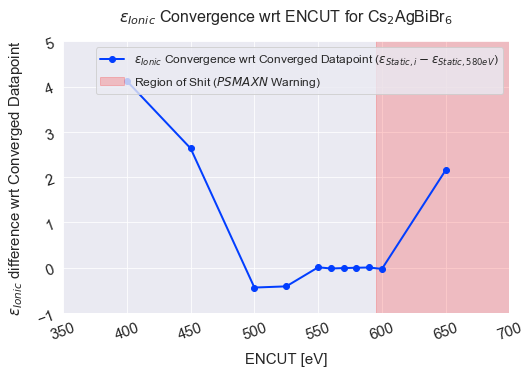

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette(sns.color_palette('bright'))
sns.set_style('darkgrid')
enconv_eps = np.array([12.111,10.623,7.551,7.577,7.998,7.972,7.981,7.988,7.994,7.962,10.144])
encut_range = np.array([400,450,500,525,550,560,570,580,590,600,650])

f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(encut_range, (enconv_eps-enconv_eps[-4]),  # color='steelblue',
           marker="o", label=r"$\epsilon_{Ionic}$ Convergence wrt Converged Datapoint ($\epsilon_{Static,i}-\epsilon_{Static,580eV}$)", linewidth=2, linestyle='-')
ax.grid(True)
ax.set_xlabel("ENCUT [eV]", labelpad=10,fontsize=15)
ax.set_ylabel(r"$\epsilon_{Ionic}$ difference wrt Converged Datapoint", labelpad=10,fontsize=15)
ax.set_title(r"$\epsilon_{Ionic}$ Convergence wrt ENCUT for Cs$_2$AgBiBr$_6$",
             fontsize=16, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax.margins(0.1)
ax.ticklabel_format(useOffset=False)
plt.setp(ax.get_yticklabels(), rotation=20, fontsize = 15); plt.setp(ax.get_xticklabels(), rotation=20, fontsize = 15)
plt.fill_between(np.arange(595,1500.1,100),-3,6,color='red',alpha=0.2,label=r'Region of Shit ($PSMAXN$ Warning)')
plt.legend(prop={'size': 12})
plt.xlim(350,700); plt.ylim(-1,5);
#print(f"Final datapoint: epsilon_(Ionic) = {enconv_eps[-1]:.3f}")
#plt.savefig('eps_static_ENCUT_Convergence_Bi.png', dpi=800)

## $\epsilon_{Optic}$

Calculated with using the method of Furthmuller et al. (`LOPTICS = True` etc). Important parameter for convergence is `NBANDS` (number of electronic bands to include in calculation).    
For demonstration purposes, convergence of $\epsilon_{Optic}$ with respect to `ENCUT` (plane wave kinetic energy cutoff)(i.e. basis set size) and **_k_**-point density (specified in `KPOINTS` file) is also given, showing that the calculated value of $\epsilon_{Optic}$ is effectively independent of these parameters, **_assuming you are using values that are above convergence for the ground-state energy of course!_** 

### `NBANDS` Convergence of $\epsilon_{Optic}$

#### $Cs_2AgBiBr_6$

Using HSE06 Hybrid DFT, Monkhorst pack k-grid 9x9x9, plane-wave cutoff of 400 eV and NBANDS from 60 to 160 (38 occupied bands).

Final datapoint value of epsilon_(Optic) = 4.435


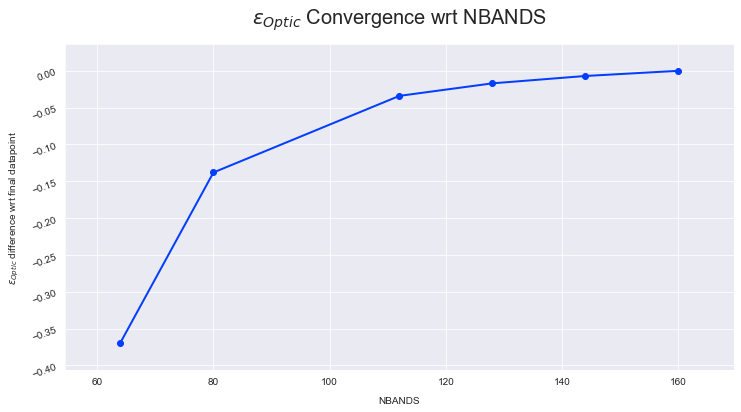

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette(sns.color_palette('bright'))
sns.set_style('darkgrid')
nbconv_eps = np.array([4.066,4.297,4.401,4.418,4.428,4.435])
nbands_range = np.array([64,80,112,128,])
f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(nbands_range, nbconv_eps-nbconv_eps[-1],  # color='steelblue',
           marker="o", label="Convergence E0", linewidth=2, linestyle='-')
ax.grid(True)
ax.set_xlabel("NBANDS", labelpad=10)
ax.set_ylabel(r"$\epsilon_{Optic}$ difference wrt final datapoint", labelpad=10)
ax.set_title(r"$\epsilon_{Optic}$ Convergence wrt NBANDS",
             fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax.margins(0.1)
ax.ticklabel_format(useOffset=False)
plt.setp(ax.get_yticklabels(), rotation=20)
print(f"Final datapoint value of epsilon_(Optic) = {nbconv_eps[-1]:.3f}")
#plt.savefig('kpoint_Convergence.png')

Note that a large number of unoccupied bands is required to converge $\epsilon_{Optic}$ to within two decimal places!

### Just for demonstration purposes:

### K-grid Convergence of $\epsilon_{Optic}$: 

#### $Cs_2AgBiBr_6$

#### DFT K-grid Convergence of $\epsilon_{Optic}$: 

Using PBEsol DFT functional, NBANDS = 120 (approx. 20 eV above VBM)(38 occupied bands), 400 eV plane-wave cutoff and Gamma-centred Monkhorst pack k-grid densities from 4x4x4 to 8x8x8.

Final datapoint value of epsilon_(Optic) = 5.981


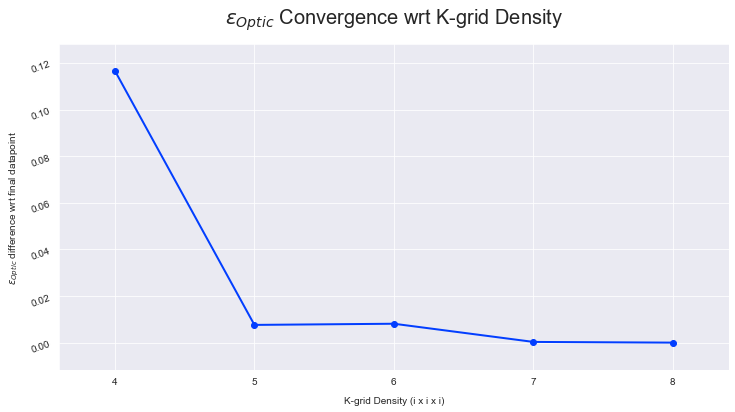

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette(sns.color_palette('bright'))
sns.set_style('darkgrid')
kconv_eps = np.array([6.098,5.989,5.9895,5.9817,5.9814])
k_range = np.arange(4, 8.1)

f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(k_range, (kconv_eps-kconv_eps[-1]),  # color='steelblue',
           marker="o", linewidth=2, linestyle='-')
ax.grid(True)
ax.set_xlabel("K-grid Density (i x i x i)", labelpad=10)
ax.set_ylabel(r"$\epsilon_{Optic}$ difference wrt final datapoint", labelpad=10)
ax.set_title(r"$\epsilon_{Optic}$ Convergence wrt K-grid Density",
             fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax.margins(0.1)
ax.ticklabel_format(useOffset=False)
plt.setp(ax.get_yticklabels(), rotation=20)
print(f"Final datapoint value of epsilon_(Optic) = {kconv_eps[-1]:.3f}")
#plt.savefig('kpoint_Convergence.png')

#### HSE06 K-grid Convergence of $\epsilon_{Optic}$: 

Using HSE06 Hybrid DFT, NBANDS = 120 (approx. 20 eV above VBM)(38 occupied bands), 400 eV plane-wave cutoff and Gamma-centred Monkhorst pack k-grid densities from 4x4x4 to 8x8x8.

Final datapoint value of epsilon_(Optic) = 4.425


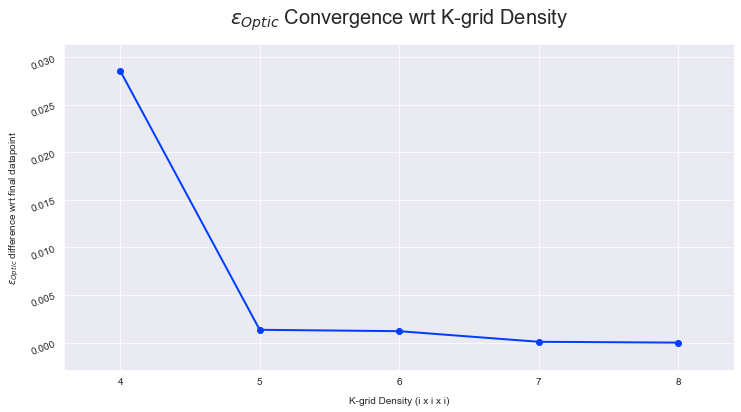

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette(sns.color_palette('bright'))
sns.set_style('darkgrid')
kconv_eps = np.array([4.453663,4.426456,4.426311,4.425196,4.425109])
k_range = np.arange(4, 8.1)

f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(k_range, (kconv_eps-kconv_eps[-1]),  # color='steelblue',
           marker="o", linewidth=2, linestyle='-')
ax.grid(True)
ax.set_xlabel("K-grid Density (i x i x i)", labelpad=10)
ax.set_ylabel(r"$\epsilon_{Optic}$ difference wrt final datapoint", labelpad=10)
ax.set_title(r"$\epsilon_{Optic}$ Convergence wrt K-grid Density",
             fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax.margins(0.1)
ax.ticklabel_format(useOffset=False)
plt.setp(ax.get_yticklabels(), rotation=20)
print(f"Final datapoint value of epsilon_(Optic) = {kconv_eps[-1]:.3f}")
#plt.savefig('kpoint_Convergence.png')

### ENCUT Convergence of $\epsilon_{Optic}$: 

#### $Cs_2AgSbBr_6$

Using HSE06 hybrid DFT functional, NBANDS = 96 (approx. 15 eV above VBM, just over twice the number of occupied bands (38 occupied bands)), a Gamma-centred Monkhorst pack k-grid density of 9 x 9 x 9, and plane-wave energy cutoff values from 400 to 800 eV.

Final datapoint of epsilon_(Optic) = 4.4419


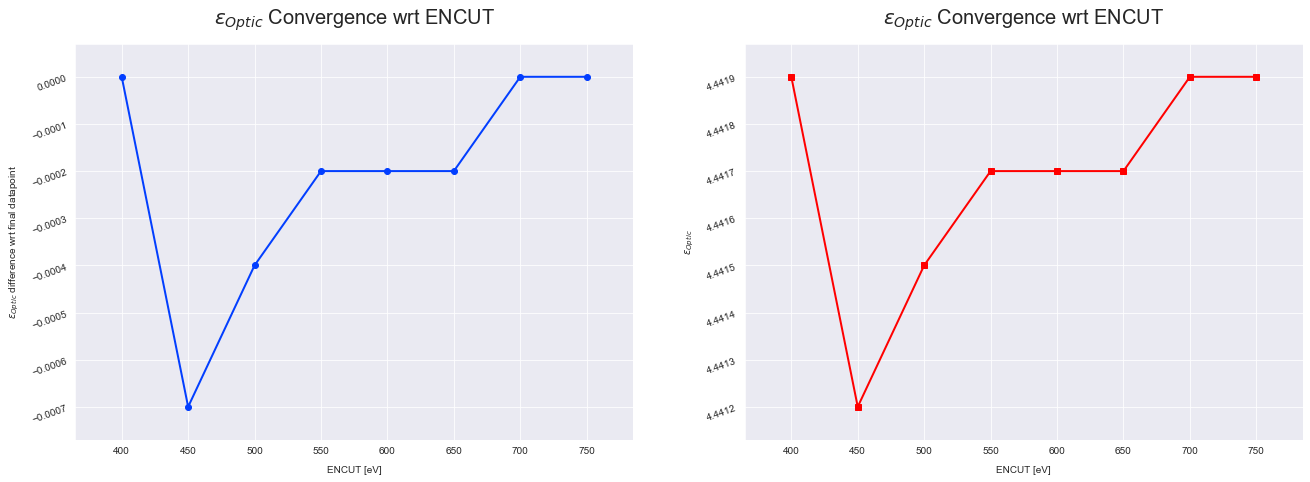

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette(sns.color_palette('bright'))
sns.set_style('darkgrid')
eps_optic = np.array([4.4419,4.4412,4.4415,4.4417,4.4417,4.4417,4.4419,4.4419]) 
encut_range = np.arange(400, 751, 50)

f, ax = plt.subplots(1, 2, figsize=(22, 10))
ax[0].plot(encut_range,eps_optic-eps_optic[-1],  # color='steelblue',
           marker="o", label="Convergence E0", linewidth=2, linestyle='-')
ax[0].grid(True)
ax[0].set_xlabel("ENCUT [eV]", labelpad=10)
ax[0].set_ylabel(r"$\epsilon_{Optic}$ difference wrt final datapoint", labelpad=10)
ax[0].set_title(r"$\epsilon_{Optic}$ Convergence wrt ENCUT",
                fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax[0].margins(0.1)
ax[0].ticklabel_format(useOffset=False)
plt.setp(ax[0].get_yticklabels(), rotation=20)
f.subplots_adjust(bottom=0.3, top=0.85)  # Adjusting specific margins
ax[1].ticklabel_format(useOffset=False)
ax[1].plot(encut_range,eps_optic, color='red',
           marker="s", label="Convergence E0", linewidth=2)
ax[1].grid(True)
ax[1].set_xlabel("ENCUT [eV]", labelpad=10)
ax[1].set_ylabel(r"$\epsilon_{Optic}$", labelpad=10)
ax[1].set_title(r"$\epsilon_{Optic}$ Convergence wrt ENCUT",
                fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax[1].margins(0.1)
plt.setp(ax[1].get_yticklabels(), rotation=20);
#plt.savefig('kpoint_Convergence.png')
print(f"Final datapoint of epsilon_(Optic) = {eps_optic[-1]}")

#### $Cs_2AgBiBr_6$

Using HSE06 hybrid DFT functional, NBANDS = 112 (38 occupied bands), a Gamma-centred Monkhorst pack k-grid density of 9 x 9 x 9, and plane-wave energy cutoff values from 400 to 550 eV. `PSMAXN` warning occurs at 600 eV and above.

Final datapoint of epsilon_(Optic) = 4.401


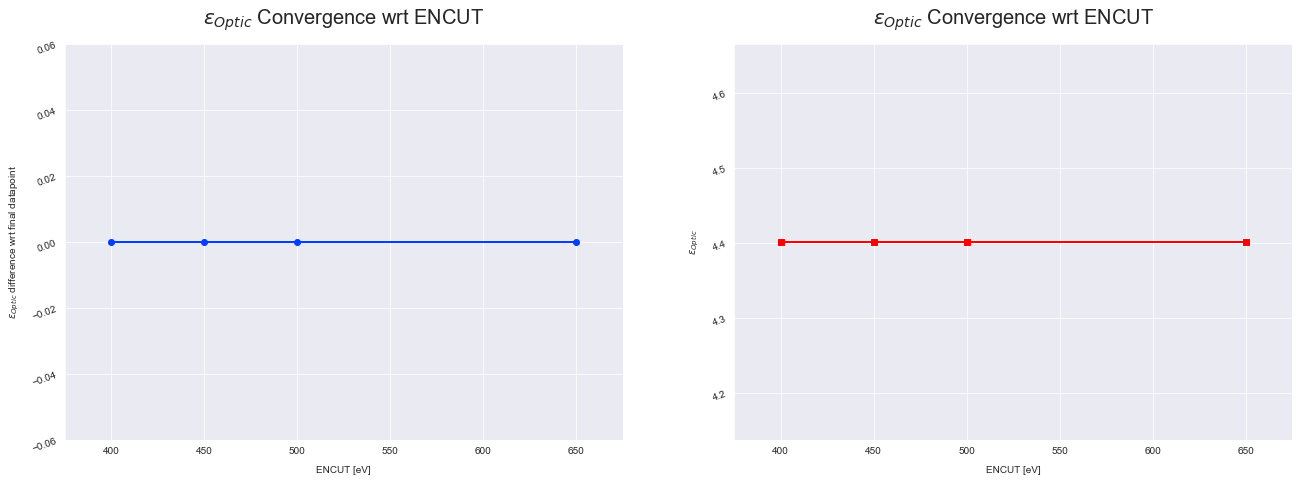

In [3]:
import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns; 
%matplotlib inline
sns.set_palette(sns.color_palette('bright')); sns.set_style('darkgrid');
eps_optic = np.array([4.401,4.401,4.401,4.401]) 
encut_range = np.array([400, 450, 500,650])

f, ax = plt.subplots(1, 2, figsize=(22, 10))
ax[0].plot(encut_range,eps_optic-eps_optic[-1],  # color='steelblue',
           marker="o", label="Convergence E0", linewidth=2, linestyle='-')
ax[0].grid(True)
ax[0].set_xlabel("ENCUT [eV]", labelpad=10)
ax[0].set_ylabel(r"$\epsilon_{Optic}$ difference wrt final datapoint", labelpad=10)
ax[0].set_title(r"$\epsilon_{Optic}$ Convergence wrt ENCUT",
                fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax[0].margins(0.1)
ax[0].ticklabel_format(useOffset=False)
plt.setp(ax[0].get_yticklabels(), rotation=20)
f.subplots_adjust(bottom=0.3, top=0.85)  # Adjusting specific margins
ax[1].ticklabel_format(useOffset=False)
ax[1].plot(encut_range,eps_optic, color='red',
           marker="s", label="Convergence E0", linewidth=2)
ax[1].grid(True)
ax[1].set_xlabel("ENCUT [eV]", labelpad=10)
ax[1].set_ylabel(r"$\epsilon_{Optic}$", labelpad=10)
ax[1].set_title(r"$\epsilon_{Optic}$ Convergence wrt ENCUT",
                fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax[1].margins(0.1)
plt.setp(ax[1].get_yticklabels(), rotation=20);
#plt.savefig('kpoint_Convergence.png')
print(f"Final datapoint of epsilon_(Optic) = {eps_optic[-1]}")